# HK-2022 cross section dataset

## Data import and drop unnecessary rows

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
#prevent SettingWithCopyWarning message from appearing
pd.options.mode.chained_assignment = None

hk_2022 = pd.read_csv('./Data/HK_2022.csv', dtype={'plz': object, 'kid2019': object})

df_original = pd.DataFrame(hk_2022)

df_original['adat_year'] = df_original['adat'].astype(str).str[:4]
df_original['adat_year'] = pd.to_numeric(df_original['adat_year'])

number_of_transactions_per_year = df_original.groupby('adat_year')['price_sqm'].count()
print(number_of_transactions_per_year)

object_features = [ 'ausstattung', 'denkmalobjekt', 'einbaukueche', 'ferienhaus', 'gaestewc', 'garten', 'haustier_erlaubt', 'kategorie_Haus']
general_object_information = ['bauphase', 'einliegerwohnung', 'foerderung', 'immobilientyp', 'kaufvermietet', 'mieteinnahmenpromonat', 'nebenraeume', 'rollstuhlgerecht']
area_information = ['nutzflaeche']
energy_and_structure_information = ['energieausweistyp', 'energieeffizienzklasse', 'ev_kennwert', 'ev_wwenthalten', 'heizkosten', 'heizungsart', 'letzte_modernisierung']
price_information = ['parkplatzpreis']
regional_information = ['gid2019', 'kid2019', 'ergg_1km', 'blid']
meta_information_advertisement = ['click_customer', 'click_schnellkontakte', 'click_url', 'click_weitersagen', 'hits', 'laufzeittage', 'hits_gen']
technical_variables = ['bef1', 'bef2', 'bef3', 'bef4', 'bef5', 'bef6', 'bef7', 'bef8', 'bef9', 'bef10', 'anbieter', 'duplicateid', 'click_schnellkontakte_gen', 'click_weitersagen_gen', 'click_url_gen']
other_variables = ['liste_show', 'liste_match', 'liste_show_gen', 'liste_match_gen']
columns_to_drop = object_features + general_object_information + area_information + energy_and_structure_information + price_information + regional_information + meta_information_advertisement + technical_variables + other_variables
df_original.drop(columns=columns_to_drop, axis=1, inplace=True)

df = df_original[df_original['adat_year'] == 2022]

print(df.shape)
df.head()

adat_year
2020      2830
2021     22073
2022    234444
Name: price_sqm, dtype: int64
(234444, 15)


,obid,plz,kaufpreis,baujahr,wohnflaeche,grundstuecksflaeche,zimmeranzahl,schlafzimmer,badezimmer,keller,parkplatz,objektzustand,adat,price_sqm,adat_year
1,132220614,7639,980000.0,NaN,180.0,700,6,4,3,No,Yes,Well kempt,2022m9,5444.4443,2022
2,131746727,67480,572000.0,NaN,246.0,860,8,6,2,No,Yes,Well kempt,2022m2,2325.2034,2022
3,133856230,Other missing,275000.0,NaN,187.0,1000,5,4,2,No,Other missing,Not specified,2022m5,1470.5883,2022
4,131486960,57550,349000.0,2008.0,165.0,920,5,3,1,No,Yes,Like new,2022m1,2115.1516,2022
5,133721583,Other missing,399000.0,NaN,298.0,1911,8,Other missing,Other missing,Yes,Other missing,Modernised,2022m5,1338.9261,2022


## Cleaning of characteristics

In [8]:
df_characteristics = df[df['baujahr'].notna()]
df_characteristics['age'] = df_characteristics['adat_year'] - df_characteristics['baujahr']

df_characteristics = df_characteristics[df_characteristics['zimmeranzahl'].notna()]
df_characteristics = df_characteristics[~df_characteristics['zimmeranzahl'].str.contains("Implausible value")]
df_characteristics['zimmeranzahl'] = pd.to_numeric(df_characteristics['zimmeranzahl'])
df_characteristics = df_characteristics[(df_characteristics['zimmeranzahl'] > 0) & (df_characteristics['zimmeranzahl'] < 30)]


df_characteristics = df_characteristics[df_characteristics['schlafzimmer'].notna()]
df_characteristics = df_characteristics[~df_characteristics['schlafzimmer'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['schlafzimmer'].str.contains("Implausible value")]
df_characteristics['schlafzimmer'] = pd.to_numeric(df_characteristics['schlafzimmer'])
df_characteristics = df_characteristics[(df_characteristics['schlafzimmer'] > 0) & (df_characteristics['schlafzimmer'] < 15)]

df_characteristics = df_characteristics[df_characteristics['badezimmer'].notna()]
df_characteristics = df_characteristics[~df_characteristics['badezimmer'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['badezimmer'].str.contains("Implausible value")]
df_characteristics['badezimmer'] = pd.to_numeric(df_characteristics['badezimmer'])
df_characteristics = df_characteristics[(df_characteristics['badezimmer'] > 0) & (df_characteristics['badezimmer'] < 15)]

df_characteristics = df_characteristics[df_characteristics['wohnflaeche'].notna()]
df_characteristics['wohnflaeche'] = pd.to_numeric(df_characteristics['wohnflaeche'])
df_characteristics = df_characteristics[(df_characteristics['wohnflaeche'] > 0) & (df_characteristics['wohnflaeche'] < 5000)]

df_characteristics = df_characteristics[df_characteristics['grundstuecksflaeche'].notna()]
df_characteristics = df_characteristics[~df_characteristics['grundstuecksflaeche'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['grundstuecksflaeche'].str.contains("Implausible value")]
df_characteristics['grundstuecksflaeche'] = pd.to_numeric(df_characteristics['grundstuecksflaeche'])
df_characteristics = df_characteristics[(df_characteristics['grundstuecksflaeche'] > 0) & (df_characteristics['grundstuecksflaeche'] < 5000)]

df_characteristics = df_characteristics[~df_characteristics['objektzustand'].str.contains("Not specified")]
df_characteristics = df_characteristics[~df_characteristics['objektzustand'].str.contains("By arrangement")]
df_characteristics['objektzustand'] = df_characteristics['objektzustand'].astype('category')
df_characteristics['objektzustand'] = df_characteristics['objektzustand'].cat.reorder_categories(['Dilapidated', 'Needs renovation', 'Well kempt', 'Modernised', 'Reconstructed', 'Completely renovated', 'Like new', 'First occupancy after reconstruction', 'First occupancy'], ordered=True)
df_characteristics['objektzustand'] = df_characteristics['objektzustand'].cat.codes

df_characteristics['parkplatz'] = df_characteristics['parkplatz'].str.replace('Other missing', 'No')
df_characteristics['parkplatz'] = df_characteristics['parkplatz'].astype('category')
df_characteristics['parkplatz'] = df_characteristics['parkplatz'].cat.reorder_categories(['No', 'Yes'], ordered=True)
df_characteristics['parkplatz'] = df_characteristics['parkplatz'].cat.codes

df_characteristics['keller'] = df_characteristics['keller'].str.replace('Other missing', 'No')
df_characteristics['keller'] = df_characteristics['keller'].astype('category')
df_characteristics['keller'] = df_characteristics['keller'].cat.reorder_categories(['No', 'Yes'], ordered=True)
df_characteristics['keller'] = df_characteristics['keller'].cat.codes

print(df_characteristics.shape)
df_characteristics.head()

(71049, 16)


,obid,plz,kaufpreis,baujahr,wohnflaeche,grundstuecksflaeche,zimmeranzahl,schlafzimmer,badezimmer,keller,parkplatz,objektzustand,adat,price_sqm,adat_year,age
4,131486960,57550,349000.0,2008.0,165.0,920.0,5.0,3,1,0,1,6,2022m1,2115.1516,2022,14.0
6,135643136,5282,490000.0,1950.0,200.0,1270.0,3.0,3,3,0,1,6,2022m9,2450.0000,2022,72.0
8,135908255,24943,549000.0,2000.0,130.0,750.0,4.0,3,2,0,1,2,2022m8,4223.0771,2022,22.0
9,132107530,24943,330000.0,1978.0,104.0,466.0,4.0,2,1,1,1,2,2022m2,3173.0769,2022,44.0
13,133180725,24937,275000.0,1924.0,110.0,678.0,4.5,2,2,1,0,1,2022m4,2500.0000,2022,98.0


## Merge locational information

In [9]:
plz_city = pd.read_csv('./Data/zuordnung_plz_ort.csv', dtype={'plz': object})
df_plz_city = pd.DataFrame(plz_city)
df_plz_city.drop('osm_id', axis=1, inplace=True)
df_plz_city = df_plz_city.drop_duplicates(subset=['plz'])

df = pd.merge(df_characteristics, df_plz_city, how="left", on="plz", validate="m:1")
df = df[df['ort'].notna()]

#df = df.groupby('bundesland')['kaufpreis', 'price_sqm'].mean()
#print(df)

plz_einwohner_df = pd.read_csv('./Data/plz_einwohner.csv', sep=',', dtype={'plz': object, 'einwohner': int})
einwohner_bundesland_df = pd.merge(df_plz_city, plz_einwohner_df, how="left", on="plz")

einwohner_bundesland_df = einwohner_bundesland_df.groupby('bundesland')['einwohner'].sum()

df = pd.merge(df, einwohner_bundesland_df, how="left", on="bundesland")

print(df.shape)
df.head()

(67036, 21)


,obid,plz,kaufpreis,baujahr,wohnflaeche,grundstuecksflaeche,zimmeranzahl,schlafzimmer,badezimmer,keller,...,objektzustand,adat,price_sqm,adat_year,age,ags,ort,landkreis,bundesland,einwohner
0,135908255,24943,549000.0,2000.0,130.00,750.0,4.0,3,2,0,...,2,2022m8,4223.0771,2022,22.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421
1,132107530,24943,330000.0,1978.0,104.00,466.0,4.0,2,1,1,...,2,2022m2,3173.0769,2022,44.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421
2,133180725,24937,275000.0,1924.0,110.00,678.0,4.5,2,2,1,...,1,2022m4,2500.0000,2022,98.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421
3,136564340,24943,1849990.0,2012.0,409.60,316.0,10.5,5,5,0,...,2,2022m12,4516.5771,2022,10.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421
4,133289723,24943,560000.0,2006.0,124.98,504.0,4.5,3,2,0,...,3,2022m11,4480.7168,2022,16.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421


## Merge unemployment and income

In [10]:
unemployment_rate = pd.read_csv('./Data/Macroeconomic Data States/Unemployment-rate.csv')
df_unemployment_rate = pd.DataFrame(unemployment_rate)
df_unemployment_rate.rename(columns={'Bundesland': 'bundesland'}, inplace=True)

df = pd.merge(df, df_unemployment_rate, how="inner", on="bundesland")

income = pd.read_csv('./Data/Macroeconomic Data States/Income.csv')
df_income = pd.DataFrame(income)
df_income.rename(columns={'Bundesland': 'bundesland'}, inplace=True)

df = pd.merge(df, df_income, how="inner", on="bundesland")

print(df.shape)
df.head()

(67036, 23)


,obid,plz,kaufpreis,baujahr,wohnflaeche,grundstuecksflaeche,zimmeranzahl,schlafzimmer,badezimmer,keller,...,price_sqm,adat_year,age,ags,ort,landkreis,bundesland,einwohner,Arbeitslosenquote,Einkommen
0,135908255,24943,549000.0,2000.0,130.00,750.0,4.0,3,2,0,...,4223.0771,2022,22.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820
1,132107530,24943,330000.0,1978.0,104.00,466.0,4.0,2,1,1,...,3173.0769,2022,44.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820
2,133180725,24937,275000.0,1924.0,110.00,678.0,4.5,2,2,1,...,2500.0000,2022,98.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820
3,136564340,24943,1849990.0,2012.0,409.60,316.0,10.5,5,5,0,...,4516.5771,2022,10.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820
4,133289723,24943,560000.0,2006.0,124.98,504.0,4.5,3,2,0,...,4480.7168,2022,16.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820


## Merge population densisty, GDP per capita, inflation and vacancy rate

In [11]:
population_density = pd.read_csv('./Data/Macroeconomic Data States/Population-density.csv')
df_population_density = pd.DataFrame(population_density)
df_population_density.rename(columns={'Bundesland': 'bundesland'}, inplace=True)

df = pd.merge(df, df_population_density, how="inner", on="bundesland")

gdp_per_capita = pd.read_csv('./Data/Macroeconomic Data States/GDP-per-capita.csv')
df_gdp_per_capita = pd.DataFrame(gdp_per_capita)
df_gdp_per_capita.rename(columns={'Bundesland': 'bundesland'}, inplace=True)

df = pd.merge(df, df_gdp_per_capita, how="inner", on="bundesland")

inflation = pd.read_csv('./Data/Macroeconomic Data States/Inflation.csv')
df_inflation = pd.DataFrame(inflation)
df_inflation.rename(columns={'Bundesland': 'bundesland'}, inplace=True)

df = pd.merge(df, df_inflation, how="inner", on="bundesland")

vacancy_rate = pd.read_csv('./Data/Macroeconomic Data States/Vacancy-rate.csv')
df_vacancy_rate = pd.DataFrame(vacancy_rate)
df_vacancy_rate.rename(columns={'Bundesland': 'bundesland'}, inplace=True)

df = pd.merge(df, df_vacancy_rate, how="inner", on="bundesland")

from pathlib import Path
filepath = Path('./Data/Cleaned-Datasets/HK_2022_cleaned.csv')
df.to_csv(filepath)

print(df.shape)
df.head()

(67036, 27)


,obid,plz,kaufpreis,baujahr,wohnflaeche,grundstuecksflaeche,zimmeranzahl,schlafzimmer,badezimmer,keller,...,ort,landkreis,bundesland,einwohner,Arbeitslosenquote,Einkommen,Bevölkerungsdichte,BIP_pro_einwohner,Inflation,Leerstandsquote
0,135908255,24943,549000.0,2000.0,130.00,750.0,4.0,3,2,0,...,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820,185,38274,6.2,2.4
1,132107530,24943,330000.0,1978.0,104.00,466.0,4.0,2,1,1,...,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820,185,38274,6.2,2.4
2,133180725,24937,275000.0,1924.0,110.00,678.0,4.5,2,2,1,...,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820,185,38274,6.2,2.4
3,136564340,24943,1849990.0,2012.0,409.60,316.0,10.5,5,5,0,...,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820,185,38274,6.2,2.4
4,133289723,24943,560000.0,2006.0,124.98,504.0,4.5,3,2,0,...,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820,185,38274,6.2,2.4


## Regression Macroeconomic Factors only

### Train and test data set

In [13]:
from IPython.display import HTML, display
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
#from statsmodels.sandbox.regression.predstd import wls_prediction_std

import seaborn as sns
sns.set_style("darkgrid")

(53628, 6)
(13408, 6)
(53628,)
(13408,)
Intercept:
-60042.10091435036


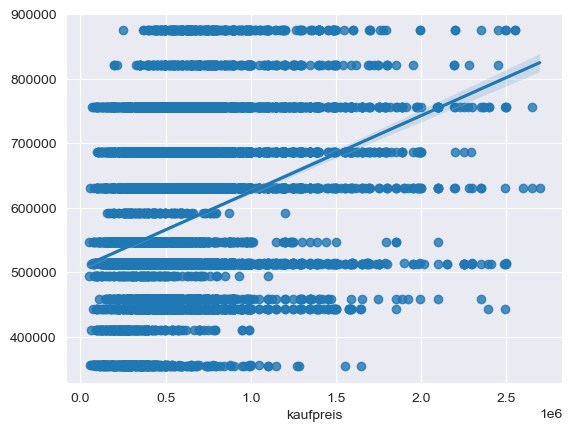

In [7]:
X = df[['einwohner','Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Inflation']]
Y = df['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Intercept:')
print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
#print(ls.summary())

In [8]:
from stargazer.stargazer import Stargazer
stargazer_tab = Stargazer([ls])
stargazer_tab.custom_columns('Model 1')
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'einwohner', 'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Inflation'])
stargazer_tab.rename_covariates({
    'einwohner': 'Number of inhabitants', 
    'Bevölkerungsdichte': 'Population density', 
    'const': 'Intercept', 
    'Arbeitslosenquote': 'Unemployment rate',
    'BIP_pro_einwohner': 'GDP per capita', 
    'Einkommen': 'Income per person', 
    'Inflation': 'Inflation'
    })
open('./Regression-Output/regression-1_hk_2022.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab

## Regression Characteristics and Macroeconomic Factors

### Train and test data set

(53628, 16)
(13408, 16)
(53628,)
(13408,)
Intercept:
337363.7825385736


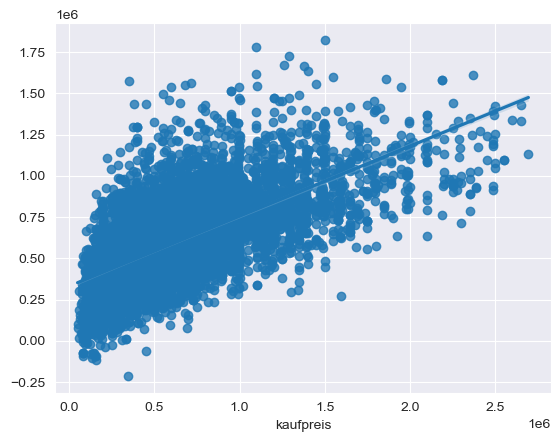

In [14]:
X = df[['wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'keller', 'parkplatz', 'age', 'objektzustand', 'einwohner', 'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Inflation', 'Leerstandsquote']]
Y = df['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Intercept:')
print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
#print(ls.summary())

In [19]:
from stargazer.stargazer import Stargazer
stargazer_tab = Stargazer([ls])
stargazer_tab.custom_columns('Model 1')
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'einwohner', 'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Inflation', 'Leerstandsquote', 'wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'keller', 'parkplatz', 'age','objektzustand'])
stargazer_tab.rename_covariates({
    'einwohner': 'Number of inhabitants', 
    'Bevölkerungsdichte': 'Population density', 
    'const': 'Intercept', 
    'Arbeitslosenquote': 'Unemployment rate',
    'BIP_pro_einwohner': 'GDP per capita', 
    'Einkommen': 'Income per person', 
    'Inflation': 'Inflation',
    'Leerstandsquote': 'Vacancy rate',
    'age': 'Age', 
    'badezimmer': 'Number of bathrooms', 
    'const': 'Intercept', 
    'grundstuecksflaeche': 'Land area',
    'keller': 'Cellar', 
    'objektzustand': 'Object condition', 
    'parkplatz': 'Parkingspace', 
    'schlafzimmer': 'Number of bedrooms', 
    'wohnflaeche': 'Living space', 
    'zimmeranzahl': 'Number of rooms'
    })
open('./Regression-Output/regression-2_hk_2022.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab